# blink detector

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
df = pd.read_csv('blinks.csv') 

# basic data info

In [4]:
df.head(10)

,Sample Index,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,Accel Channel 0,...,Other.3,Other.4,Other.5,Other.6,Analog Channel 0,Analog Channel 1,Analog Channel 2,Timestamp,Other.7,Timestamp (Formatted)
0,206.0,35326.350966,43511.716248,-2878.994093,22344.726008,187500.0,18806.891895,-48936.372869,-143650.906521,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.737535e+09,0.0,2025-01-22 03:38:55.465
1,207.0,35558.138556,43761.385234,-4244.685679,22108.289255,187500.0,17256.351382,-48717.258718,-145694.079482,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.737535e+09,0.0,2025-01-22 03:38:55.465
2,208.0,35298.344230,43503.960193,-3681.242905,22690.261625,187500.0,17640.242593,-48301.493919,-145271.497401,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.737535e+09,0.0,2025-01-22 03:38:55.465
3,209.0,35047.065919,43238.533227,-2421.632698,22882.799552,187500.0,19007.543505,-48461.644168,-143589.193355,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.737535e+09,0.0,2025-01-22 03:38:55.465
4,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.737535e+09,0.0,2025-01-22 03:38:55.529
5,1.0,33663.358827,42419.520607,-7816.203870,22495.779097,187500.0,-4754.506618,-48744.952529,-187500.022352,-0.022,...,26.0,80.0,16.0,64.0,0.0,0.0,0.0,1.737535e+09,0.0,2025-01-22 03:38:55.546
6,2.0,33345.807594,42087.574850,-6557.375974,22823.321560,187500.0,-3482.290027,-48617.726400,-187500.022352,-0.022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.737535e+09,0.0,2025-01-22 03:38:55.549
7,3.0,33353.429538,42079.260001,-6170.735499,22404.472220,187500.0,-2851.456744,-49006.333829,-187500.022352,-0.022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.737535e+09,0.0,2025-01-22 03:38:55.553
8,4.0,33690.516197,42429.489485,-7393.666493,22006.722928,187500.0,-4059.121497,-49180.968008,-187500.022352,-0.022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.737535e+09,0.0,2025-01-22 03:38:55.557
9,5.0,33730.235246,42489.548622,-7925.973287,22386.032031,187500.0,-4839.979689,-48808.118559,-187500.022352,-0.022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.737535e+09,0.0,2025-01-22 03:38:55.560


In [5]:
df.describe()

,Sample Index,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,Accel Channel 0,...,Other.2,Other.3,Other.4,Other.5,Other.6,Analog Channel 0,Analog Channel 1,Analog Channel 2,Timestamp,Other.7
count,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,...,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.0,32166.0,32166.0,3.216600e+04,32166.0
mean,127.273239,33241.210375,39245.193501,3427.693783,23180.040718,187494.170864,6828.301095,-50392.448730,-186934.265373,-0.031229,...,13.714854,2.636324,12.096251,1.538519,16.897842,0.0,0.0,0.0,1.737535e+09,0.0
std,73.865551,2049.412076,3061.950422,6316.477665,522.315941,1045.448739,6200.549945,758.546204,4822.750773,0.010373,...,50.780771,7.850642,38.184129,4.583514,56.110638,0.0,0.0,0.0,3.712765e+01,0.0
min,0.000000,0.000000,0.000000,-20998.391032,0.000000,0.000000,-16751.894862,-52059.246845,-187500.022352,-0.072000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.737535e+09,0.0
25%,63.000000,32613.698556,37564.570837,-1489.436431,22844.293084,187500.000000,3581.989984,-50931.355468,-187500.022352,-0.036000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.737535e+09,0.0
50%,127.000000,33640.872972,39792.821830,3971.603241,23155.367900,187500.000000,7461.235817,-50494.747668,-187500.022352,-0.034000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.737535e+09,0.0
75%,191.000000,34437.109165,41558.944918,8329.656968,23513.984876,187500.000000,10454.525555,-49897.240835,-187500.022352,-0.030000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.737535e+09,0.0
max,255.000000,38045.038348,45344.693404,40757.131965,28004.120648,187500.000000,51964.453097,0.000000,0.000000,0.062000,...,240.000000,30.000000,240.000000,16.000000,240.000000,0.0,0.0,0.0,1.737535e+09,0.0


In [13]:
print(df.columns)

Index(['Sample Index', ' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2',
       ' EXG Channel 3', ' EXG Channel 4', ' EXG Channel 5', ' EXG Channel 6',
       ' EXG Channel 7', ' Accel Channel 0', ' Accel Channel 1',
       ' Accel Channel 2', ' Other', ' Other.1', ' Other.2', ' Other.3',
       ' Other.4', ' Other.5', ' Other.6', ' Analog Channel 0',
       ' Analog Channel 1', ' Analog Channel 2', ' Timestamp', ' Other.7',
       ' Timestamp (Formatted)'],
      dtype='object')


# visualizing data
only channels 0 and 1 kinda apply here for blink test

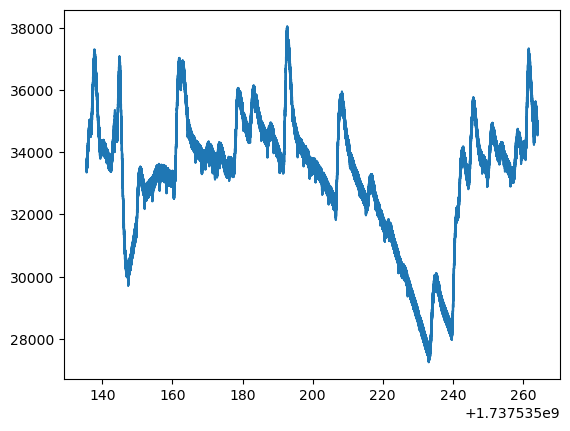

In [40]:
start = 5

x = np.array(df[' Timestamp'][start:])
y = np.array(df[' EXG Channel 0'][start:])

plt.plot(x,y)
plt.show()

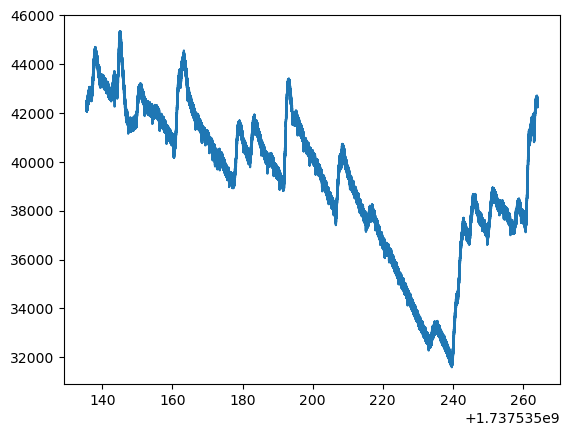

In [41]:
start = 5 # ignore noise at the beginning

x = np.array(df[' Timestamp'][start:])
y = np.array(df[' EXG Channel 1'][start:])

plt.plot(x,y)
plt.show()

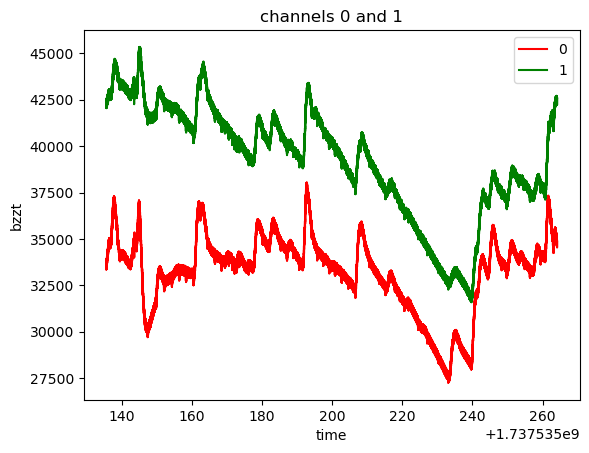

In [42]:

# Using Numpy to create an array X
X = np.array(df[' Timestamp'][start:])

# Assign variables to the y axis part of the curve
y = np.array(df[' EXG Channel 0'][start:])
z = np.array(df[' EXG Channel 1'][start:])

# Plotting both the curves simultaneously
plt.plot(X, y, color='r', label='0')
plt.plot(X, z, color='g', label='1')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("time")
plt.ylabel("bzzt")
plt.title("channels 0 and 1")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

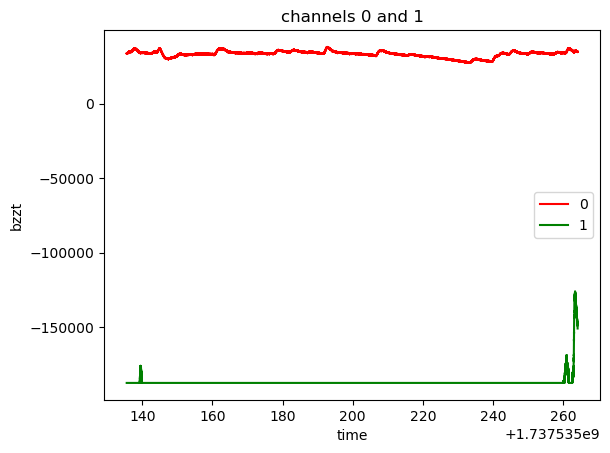

In [48]:
# you can try plotting other channels in this cell
X = np.array(df[' Timestamp'][start:])

y = np.array(df[' EXG Channel 0'][start:])
z = np.array(df[' EXG Channel 7'][start:])

plt.plot(X, y, color='r', label='0')
plt.plot(X, z, color='g', label='1')
plt.xlabel("time")
plt.ylabel("bzzt")
plt.title("channels 0 and 1")
plt.legend()
plt.show()

# find peaks

In [64]:
peaks, properties = find_peaks(df[' EXG Channel 0'][start:], prominence=1, width=20)
properties["prominences"], properties["widths"]

(array([3961.98081517, 1047.42509692, 3721.78896925, 1369.13375487,
        1121.29761234, 3955.47645753,  964.56718022, 1058.35509996,
        1207.17301454, 1773.81208823, 2851.41204016, 1137.97201371,
        8337.69242021, 4134.6033376 , 1328.54298693, 2130.41181927,
        1380.71195849, 2886.39252024, 2055.39936488, 1124.85153971,
        3096.70008382, 1093.33558003]),
 array([374.77923948,  20.14797532, 215.93058089, 237.66362345,
        124.5615074 , 737.50510571,  41.88419785,  78.84706125,
         99.73476481, 403.82547295, 658.67813833, 195.95641698,
        954.11401489, 787.90461376, 287.5949589 , 579.26468135,
        262.85659144, 445.69174114, 470.71326942, 178.92159273,
        278.92623184,  74.87238404]))

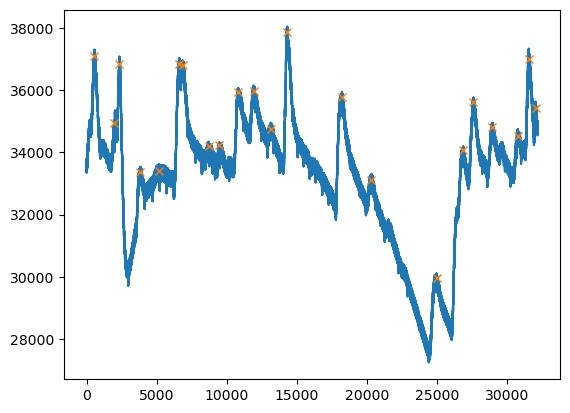

In [65]:
x = df[' EXG Channel 0'][start:]
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
# plt.plot(np.zeros_like(x), "--", color="gray") # makes a line at 0
plt.show()